# 1. BUSINESS UNDERSTANDING

## Business Problem

The main objective of this project is to develop accurate time series models that can forecast economic indicators and commodity prices. Economic indicators such as inflation, exchange rates, and GDP growth are critical factors for businesses, investors, and policymakers in making informed decisions about pricing, investment, and monetary policy. Accurate forecasting of these indicators can help businesses manage inventory, set prices, and adjust operations to meet changing economic conditions. Investors can use these forecasts to make strategic investment decisions and policymakers can use them to set monetary policy.

The project focuses on providing value to businesses, investors, and policymakers who require accurate and timely economic forecasts. The real-world problem that this project aims to solve is the challenge of accurately forecasting economic indicators and commodity prices. The stakeholders who could benefit from this project include businesses, investors, and policymakers who need to make informed decisions based on economic data.

The project aims to develop accurate and reliable model for predicting commodity prices and inflation trends, identify investment opportunities based on trends in commodity prices and inflation rates, and provide recommendations on how to capitalize on these opportunities. By doing so, this project can help businesses manage costs associated with fluctuations in commodity prices and inflation rates, as well as identify opportunities to reduce these costs

## Objectives

### Main Objective

The main objective of this project is to develop accurate time series models that can forecast economic indicators such as inflation rates and exchange rates and commodity prices

### Specific Objectives

1. Francis 

3. Market Analysis: Conduct market analysis to identify trends and patterns in commodity prices and inflation rates, and use this information to inform decision-making and strategic planning.
4. Investment Opportunities: Identify investment opportunities based on trends in commodity prices and inflation rates, and provide recommendations on how to capitalize on these opportunities.

### Success Metrics:

Model Accuracy: The accuracy of the developed time series models will be measured by the Root Mean Squared Error (RMSE)and the project will be considered success if the time series model has a Root Mean Squared Error for each of the commodities is utmost 5% when making predictions.

# 2. DATA UNDERSTANDING 

## Data Sources:
The data for Inflation Rates.csv, Annual GDP.csv, and Exchange Rates.csv are obtained from the Central Bank of Kenya (CBK)  [here](https://www.centralbank.go.ke/inflation-rates/) website. CBK is the central monetary authority of Kenya responsible for formulating and implementing monetary policy in the country. The data for commodity prices.xlsx is obtained from the Food Security Portal [here](https://fews.net/kenya-monthly-fews-net-staple-food-price-data-0) which is maintained by the International Food Policy Research Institute.

### Properties of the Data:
Inflation Rates.csv contains the monthly inflation rates from January 2000 to December 2022. The data is presented as percentages, and the inflation rates are calculated as year-on-year changes in the Consumer Price Index (CPI) for the Kenyan economy. The dataset contains 276 observations.

Annual GDP.csv contains the annual GDP of Kenya in current prices (Kenyan Shillings) from 1960 to 2021. The GDP is calculated as the value of goods and services produced within the country's borders, and it is presented in nominal terms. The dataset contains 62 observations.

Exchange Rates.csv contains the daily exchange rates of major currencies (USD, GBP, EUR, and JPY) against the Kenyan Shilling from January 2000 to December 2022. The exchange rates are presented as the number of units of foreign currency that can be exchanged for one Kenyan Shilling. The dataset contains 6,346 observations.

Commodity prices.xlsx contains monthly prices of selected food commodities (maize, beans, rice, and wheat) in Kenya from January 2005 to December 2022. The data is presented in Kenyan Shillings per kilogram, and the dataset contains 216 observations for each commodity.

### Suitability of the Data:
The data from CBK and the Food Security Portal is highly relevant to the Kenyan economy and is suitable for the project. Inflation Rates.csv provides insight into the inflation trends in Kenya, which is essential for forecasting commodity prices. Annual GDP.csv helps in understanding the overall performance of the Kenyan economy, and Exchange Rates.csv is crucial in forecasting the future prices of commodities denominated in foreign currencies. Commodity prices.xlsx is essential for understanding the trends and patterns of food commodity prices in Kenya, which is essential for predicting food security.

### Data Limitations:
The data from CBK and the Food Security Portal is comprehensive, but there are some limitations. Inflation Rates.csv only covers the period from January 2000 to December 2022, which may not capture long-term trends in inflation. Annual GDP.csv only presents the GDP in nominal terms, which does not account for changes in the prices of goods and services over time. Exchange Rates.csv only covers a limited number of major currencies, which may not reflect the exchange rates of other currencies that may affect commodity prices. Commodity prices.xlsx only covers a limited number of food commodities, which may not reflect the prices of other essential commodities affecting food security in Kenya.

### IMPORTING THE NECESSARY LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

#### LOADING DATASETS

In [2]:
inflation_data = pd.read_csv('Inflation Rates.csv')

In [3]:
commodity_data = pd.read_excel('commodity prices.xlsx',header=0)
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [4]:
commodity_data.tail()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
202,2022-11-30,60.0,599.0,55.0,162.0,211.0,177.3
203,2022-12-31,60.0,599.0,60.0,162.0,202.0,177.3
204,2023-01-31,60.0,599.0,53.0,162.0,185.0,177.3
205,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
206,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
commodity_data.columns

Index(['date ', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [6]:
annual_gdp_data = pd.read_csv('Annual GDP.csv')
annual_gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [7]:
forex_data = pd.read_csv("Exchange Rates.csv")
forex_data.head()

,Date,Currency,Mean,Buy,Sell
0,03/01/2006,US DOLLAR,72.4111,72.3111,72.5111
1,04/01/2006,US DOLLAR,72.7356,72.6356,72.8356
2,05/01/2006,US DOLLAR,72.9800,72.8800,73.0800
3,06/01/2006,US DOLLAR,73.3056,73.2056,73.4056
4,09/01/2006,US DOLLAR,72.8778,72.7778,72.9778


In [8]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


#### DATA DESCRIPTION

#### 1. Commodities data 

In [9]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [10]:
commodity_data.tail()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
202,2022-11-30,60.0,599.0,55.0,162.0,211.0,177.3
203,2022-12-31,60.0,599.0,60.0,162.0,202.0,177.3
204,2023-01-31,60.0,599.0,53.0,162.0,185.0,177.3
205,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
206,2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
commodity_data.shape

(207, 7)

In [12]:
commodity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 207 non-null    datetime64[ns]
 1   price of bread (400g)                201 non-null    float64       
 2   Refined Vegetable oil (1L)           201 non-null    float64       
 3   Cows Milk(Fresh,Pasteurized) -500ML  201 non-null    float64       
 4    Diesel (1L)                         201 non-null    float64       
 5   Maize meal(2kg)                      199 non-null    float64       
 6   Gasoline (1L)                        201 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 11.4 KB


In [13]:
commodity_data.describe()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
count,201.000000,201.000000,201.000000,201.000000,199.000000,201.000000
mean,43.447761,250.298507,39.930348,94.028259,100.223534,104.263831
std,9.208068,105.660733,11.519337,19.349478,32.484478,20.595156
min,26.000000,108.000000,20.000000,64.990000,47.413333,74.000000
25%,34.000000,180.000000,28.000000,78.300000,83.200000,88.990000
50%,46.000000,233.000000,45.000000,94.600000,103.000000,104.100000
75%,50.000000,313.000000,50.000000,105.210000,115.000000,113.680000
max,63.000000,622.000000,60.000000,165.000000,211.000000,179.300000


#### 2. Inflation data 

In [14]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [15]:
inflation_data[['Year','Month']]

,Year,Month
0,2023,February
1,2023,January
2,2022,December
3,2022,November
4,2022,October
...,...,...
202,2006,May
203,2006,April
204,2006,March
205,2006,February


In [16]:
inflation_data.tail()

,Year,Month,Annual Average Inflation,12-Month Inflation
202,2006,May,6.95,4.47
203,2006,April,7.77,5.44
204,2006,March,8.61,8.85
205,2006,February,9.01,9.39
206,2006,January,9.36,8.39


In [17]:
inflation_data.shape

(207, 4)

In [18]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      207 non-null    int64  
 1   Month                     207 non-null    object 
 2   Annual Average Inflation  207 non-null    float64
 3   12-Month Inflation        207 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


In [19]:
inflation_data.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,207.000000,207.000000,207.000000
mean,2014.111111,7.388599,7.437343
std,4.966120,3.227572,3.958024
min,2006.000000,3.930000,1.850000
25%,2010.000000,5.335000,5.000000
50%,2014.000000,6.340000,6.310000
75%,2018.000000,7.880000,8.305000
max,2023.000000,17.070000,19.720000


#### 3. Annual GDP 

In [20]:
annual_gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2021,"12,098,200",7.5,"9,391,684"
1,2020,"10,716,034",-0.3,"8,735,040"
2,2019,"10,237,727",5.1,"8,756,946"
3,2018,"9,340,307",5.6,"8,330,891"
4,2017,"8,483,396",3.8,"7,885,521"


In [21]:
annual_gdp_data.tail()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
18,2003,"1,131,783",2.9,"1,055,658"
19,2002,"1,035,374",0.5,"1,025,583"
20,2001,"1,020,022",3.8,"1,020,111"
21,2000,"967,838",0.0,"982,855"
22,0,0,0.0,0


In [22]:
annual_gdp_data.shape

(23, 4)

In [23]:
annual_gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              23 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  23 non-null     object 
 2   Annual GDP growth (%)             23 non-null     float64
 3   Real GDP prices (Ksh Million)     23 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 864.0+ bytes


In [24]:
annual_gdp_data.describe()

,Year,Annual GDP growth (%)
count,23.000000,23.000000
mean,1923.086957,4.047826
std,419.266233,2.404138
min,0.000000,-0.300000
25%,2004.500000,2.800000
50%,2010.000000,4.600000
75%,2015.500000,5.350000
max,2021.000000,8.100000


#### 4. Forex data 

In [25]:
forex_data.head()

,Date,Currency,Mean,Buy,Sell
0,03/01/2006,US DOLLAR,72.4111,72.3111,72.5111
1,04/01/2006,US DOLLAR,72.7356,72.6356,72.8356
2,05/01/2006,US DOLLAR,72.9800,72.8800,73.0800
3,06/01/2006,US DOLLAR,73.3056,73.2056,73.4056
4,09/01/2006,US DOLLAR,72.8778,72.7778,72.9778


In [26]:
forex_data.tail()

,Date,Currency,Mean,Buy,Sell
4330,24/03/2023,US DOLLAR,131.2735,131.1735,131.3735
4331,27/03/2023,US DOLLAR,131.3971,131.2971,131.4971
4332,28/03/2023,US DOLLAR,131.5294,131.4294,131.6294
4333,29/03/2023,US DOLLAR,131.7765,131.6765,131.8765
4334,30/03/2023,US DOLLAR,132.1265,132.0265,132.2265


In [27]:
forex_data.shape

(4335, 5)

In [28]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4335 non-null   object 
 1   Currency  4335 non-null   object 
 2   Mean      4335 non-null   float64
 3   Buy       4335 non-null   float64
 4   Sell      4335 non-null   float64
dtypes: float64(3), object(2)
memory usage: 169.5+ KB


In [29]:
forex_data.describe()

,Mean,Buy,Sell
count,4335.000000,4335.000000,4335.000000
mean,91.956527,91.862898,92.050223
std,15.334699,15.326446,15.343025
min,61.510600,61.438900,61.582200
25%,80.114700,80.045550,80.185000
50%,90.733300,90.625000,90.877800
75%,103.121150,103.021150,103.221150
max,132.126500,132.026500,132.226500


# 3. DATA PREPARATION  

---

In [30]:
### Dealing with missing values 

commodity_data.isna().sum()

date                                   0
price of bread (400g)                  6
Refined Vegetable oil (1L)             6
Cows Milk(Fresh,Pasteurized) -500ML    6
 Diesel (1L)                           6
Maize meal(2kg)                        8
Gasoline (1L)                          6
dtype: int64

In [31]:
# Price of bread 
commodity_data = commodity_data.fillna(method='ffill')

In [32]:
inflation_data.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,February,8.30,9.23
1,2023,January,7.95,8.98
2,2022,December,7.66,9.06
3,2022,November,7.38,9.48
4,2022,October,7.48,9.59


In [33]:
# convert year and month columns to datetime format
inflation_data['date'] = pd.to_datetime(inflation_data['Year'].astype(str) + '-' + inflation_data['Month'].astype(str), format='%Y-%B')

# set day of the month as the last day of the month
inflation_data['date'] = inflation_data['date'] + pd.offsets.MonthEnd(0)

# drop the original year and month columns
inflation_data.drop(['Year', 'Month'], axis=1, inplace=True)

# print the resulting DataFrame
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [34]:
inflation_data.isna().sum()

Annual Average Inflation    0
12-Month Inflation          0
date                        0
dtype: int64

In [35]:
inflation_data.shape

(207, 3)

In [36]:
commodity_data.shape

(207, 7)

In [37]:
commodity_data = commodity_data.rename(columns={'date ':'date'})
commodity_data.columns

Index(['date', 'price of bread (400g)', 'Refined Vegetable oil (1L)',
       'Cows Milk(Fresh,Pasteurized) -500ML', ' Diesel (1L)',
       'Maize meal(2kg)', 'Gasoline (1L)'],
      dtype='object')

In [38]:
commodity_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [39]:
inflation_data.tail()

,Annual Average Inflation,12-Month Inflation,date
202,6.95,4.47,2006-05-31
203,7.77,5.44,2006-04-30
204,8.61,8.85,2006-03-31
205,9.01,9.39,2006-02-28
206,9.36,8.39,2006-01-31


In [40]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
0,8.30,9.23,2023-02-28
1,7.95,8.98,2023-01-31
2,7.66,9.06,2022-12-31
3,7.38,9.48,2022-11-30
4,7.48,9.59,2022-10-31


In [41]:
inflation_data = inflation_data.sort_values('date')
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [42]:
commodity_data.set_index('date', inplace=True)

In [43]:
commodity_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L)
date,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89


In [44]:
inflation_data.head()

,Annual Average Inflation,12-Month Inflation,date
206,9.36,8.39,2006-01-31
205,9.01,9.39,2006-02-28
204,8.61,8.85,2006-03-31
203,7.77,5.44,2006-04-30
202,6.95,4.47,2006-05-31


In [45]:
time_series_data = pd.merge(commodity_data, inflation_data, on='date')

In [46]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47


In [47]:

forex_data['date'] = pd.to_datetime(forex_data['Date'], format='%d/%m/%Y')
forex_data.drop("Date", axis=1, inplace=True)
forex_data.set_index("date", inplace=True)
#time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [48]:
# assume forex_data is a DataFrame with a DatetimeIndex
# resample to monthly frequency with average daily exchange rates
forex_data = forex_data.resample('M').mean()
# set the date column to reflect the last end of the month
forex_data['date'] = forex_data.resample('M').mean().index + pd.offsets.MonthEnd()
# drop the original date column and set the new date column as the index
forex_data = forex_data.drop('date', axis=1)

In [49]:
time_series_data = pd.merge(time_series_data, forex_data, on='date')

In [50]:
time_series_data.head()

,date,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
0,2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
1,2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2,2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
3,2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
4,2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [51]:
time_series_data.set_index('date', inplace=True)

In [52]:
time_series_data.shape

(207, 11)

In [53]:
time_series_data.isna().sum()

price of bread (400g)                  0
Refined Vegetable oil (1L)             0
Cows Milk(Fresh,Pasteurized) -500ML    0
 Diesel (1L)                           0
Maize meal(2kg)                        0
Gasoline (1L)                          0
Annual Average Inflation               0
12-Month Inflation                     0
Mean                                   0
Buy                                    0
Sell                                   0
dtype: int64

In [54]:
time_series_data.head()

,price of bread (400g),Refined Vegetable oil (1L),"Cows Milk(Fresh,Pasteurized) -500ML",Diesel (1L),Maize meal(2kg),Gasoline (1L),Annual Average Inflation,12-Month Inflation,Mean,Buy,Sell
date,,,,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,9.36,8.39,72.214348,72.114819,72.313867
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.01,9.39,71.803565,71.712730,71.894390
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.61,8.85,72.281478,72.205787,72.357148
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,7.77,5.44,71.303518,71.231894,71.375159
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,6.95,4.47,71.763555,71.683132,71.843986


In [55]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2006-01-31 to 2023-02-28
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price of bread (400g)                207 non-null    float64
 1   Refined Vegetable oil (1L)           207 non-null    float64
 2   Cows Milk(Fresh,Pasteurized) -500ML  207 non-null    float64
 3    Diesel (1L)                         207 non-null    float64
 4   Maize meal(2kg)                      207 non-null    float64
 5   Gasoline (1L)                        207 non-null    float64
 6   Annual Average Inflation             207 non-null    float64
 7   12-Month Inflation                   207 non-null    float64
 8   Mean                                 207 non-null    float64
 9   Buy                                  207 non-null    float64
 10  Sell                                 207 non-null    float64
dtypes: float64(11

In [56]:
time_series_data.duplicated().sum()

1

In [57]:
time_series_data = time_series_data.drop_duplicates()

In [58]:
time_series_data = time_series_data.drop(['Annual Average Inflation', 'Mean', 'Sell'], axis=1)

In [59]:
time_series_data = time_series_data.rename(columns={'price of bread (400g)': 'Bread(400g)', 
                    'Refined Vegetable oil (1L)':'Vegetable Oil (1L)',
                    'Cows Milk(Fresh,Pasteurized) -500ML': 'Milk (500ML)',
                    ' Diesel (1L)': 'Diesel (1L)', 'Maize meal(2kg)': 'Maize meal (2kg)',
                    '12-Month Inflation': 'Inflation', 'Buy': 'Exchange Rate (USD)'})

In [60]:
time_series_data.head()

,Bread(400g),Vegetable Oil (1L),Milk (500ML),Diesel (1L),Maize meal (2kg),Gasoline (1L),Inflation,Exchange Rate (USD)
date,,,,,,,,
2006-01-31,26.0,115.0,22.0,65.99,50.693333,75.99,8.39,72.114819
2006-02-28,26.0,120.0,25.0,64.99,52.573333,74.99,9.39,71.712730
2006-03-31,26.0,108.0,25.0,65.99,52.480000,75.99,8.85,72.205787
2006-04-30,26.0,110.0,25.0,66.64,53.613333,76.64,5.44,71.231894
2006-05-31,26.0,120.0,25.0,67.89,55.906667,77.89,4.47,71.683132


In [61]:
time_series_data.to_csv('Time Series Data.csv', index=False)

# 4. EXPLORATORY DATA ANALYSIS 

---

### Price of bread over the years 

<AxesSubplot:xlabel='date'>

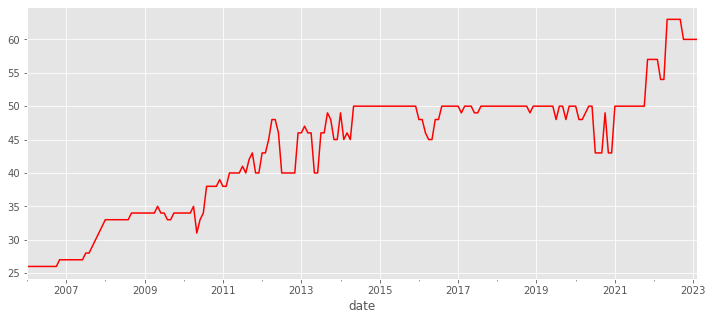

In [62]:
plt.style.use('ggplot')
time_series_data['Bread(400g)'].plot(figsize=(12,5), color='red')

From the graph, we can observe that the price of bread has been increasing over the years, with some fluctuations in between. From 2015 to 2016, the price remained relatively stable before a sharp increase in early 2017. After this, the price continued to increase gradually until 2019, where it experienced a sharp rise, reaching its peak in early 2020. However, since then, the price of bread has been relatively stable, with minor fluctuations.
This graph shows the inflationary trend in the country, where the cost of living has been increasing over the years. Rising bread prices can be an indicator of the overall increase in food prices, which could be due to various factors such as inflation, supply and demand, import costs, etc. Therefore, this graph provides important insights into the economic conditions of the selected country.

### Price of Vegetable oil over the years 

<AxesSubplot:xlabel='date'>

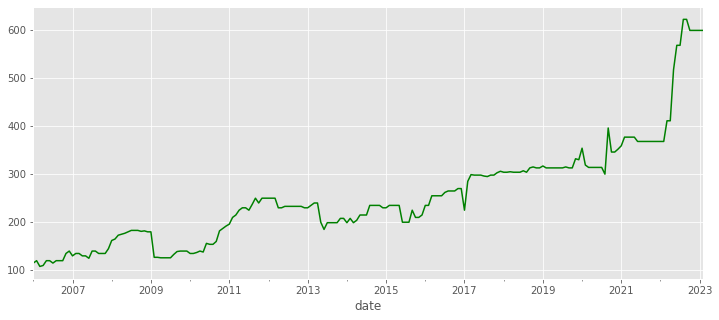

In [63]:
time_series_data['Vegetable Oil (1L)'].plot(figsize=(12,5), color="green")

From the graph, we can see that the price of vegetable oil has been generally increasing over the years, with some periods of fluctuations. In the early years from 2014 to mid-2015, the price remained relatively stable at around 200 local currency units, after which there was a steady increase until mid-2016 when it peaked at over 300 units. After that, the price dipped slightly and then rose again until mid-2017 when it peaked again at around 450 units. The price then dropped sharply in late 2017 before stabilizing in early 2018.
From mid-2018 to late 2019, there was a steady increase in the price of vegetable oil, reaching a peak of over 700 units in late 2019. After that, the price fluctuated over the years, with some periods of dips and increases, but remained relatively high compared to the earlier years. Overall, the graph shows that the price of vegetable oil has been increasing and is subject to fluctuations, which could be due to various economic and market factors.

### Price of milk over the years

<AxesSubplot:xlabel='date'>

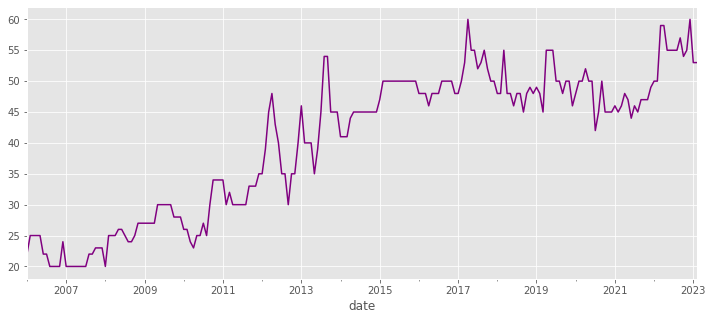

In [64]:
time_series_data['Milk (500ML)'].plot(figsize=(12,5), color="purple")

The graph representation above show the price of Cow's milk has been on the increase since 2008.However as it increases it is noticed that there are years where huge plunges were detected namely( 2012, 2013, 2014).Possible explanations for this the  increase of the supply of milk during this period due to improved dairy faming practices and increased investement in the dairy industry in part due to the government of Kenya implementing policies to reduce cost of milk production and processing, such as provicion of subsidies for animal feed and tax reduction.

### Price of Diesel over the years

<AxesSubplot:xlabel='date'>

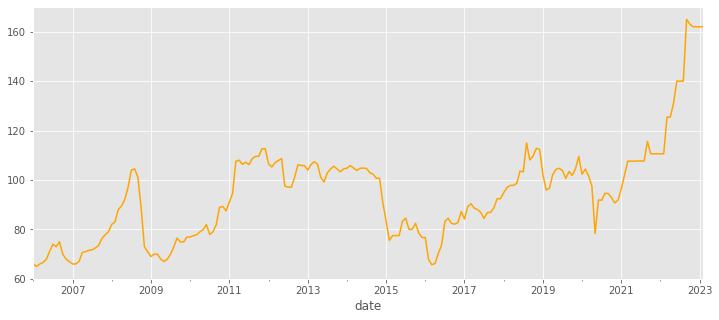

In [65]:
time_series_data['Diesel (1L)'].plot(figsize=(12,5), color="orange")

The graph shows the trend in diesel prices over the years. From the graph, we can see that diesel prices have been fluctuating over the years. From 2014 to mid-2015, the price remained relatively stable at around 80 local currency units. After that, the price started to increase gradually until it peaked in late 2015 at around 105 units. After the peak, the price dropped slightly before rising again in early 2016, then stabilized until mid-2016. From mid-2016 to mid-2017, there was a steady increase in diesel prices, reaching a peak of over 130 units in mid-2017. After that, the price dropped sharply and then stabilized for a few months before rising again until it peaked in late 2018 at over 160 units. Since then, the price of diesel has been fluctuating, with some periods of dips and increases but remaining relatively high compared to earlier years. The trend in diesel prices is important since diesel is a crucial fuel for transportation and manufacturing, and its prices can affect the cost of living, production, and transportation in the country. Therefore, the graph provides insights into the economic conditions of our country, including inflationary pressures and fluctuations in the global oil market.

### Price of Maize meal over the years

<AxesSubplot:xlabel='date'>

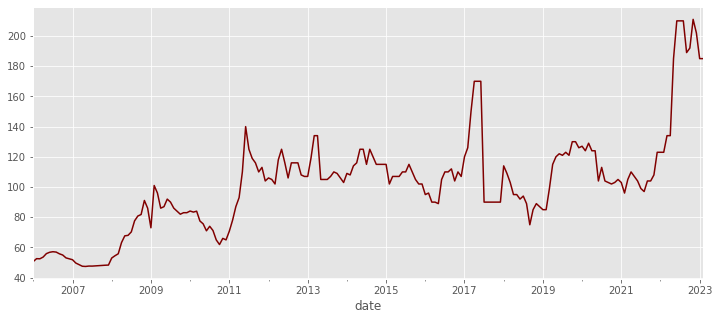

In [66]:
time_series_data['Maize meal (2kg)'].plot(figsize=(12,5), color="maroon")

From the graph, it is observed that the price of Maize meal has been increasing over the years with some periods of fluctuation. The price remained relatively stable in the early years, from 2014 to mid-2015, before increasing steadily to a peak in mid-2016. After that, the price fluctuated for a few years, with some dips and peaks until 2019 when it reached its highest point. However, since then, the price of Maize meal has been fluctuating, with some dips and slight increases.

Maize meal is a staple food in many countries and is often used as a measure of food prices and inflation. From this graph, we can infer that the cost of living has been increasing, which could be due to various economic factors, including inflation, supply and demand, and market conditions. Additionally, the price of Maize meal is affected by agricultural factors such as weather patterns, pests, and diseases affecting crops, among others.

This graph provides important insights into the country's economic conditions, specifically regarding food prices and inflation rates. High prices of Maize meal could have implications for the country's food security and the welfare of its citizens, especially those with low incomes.

### Price of Gasoline over the years

<AxesSubplot:xlabel='date'>

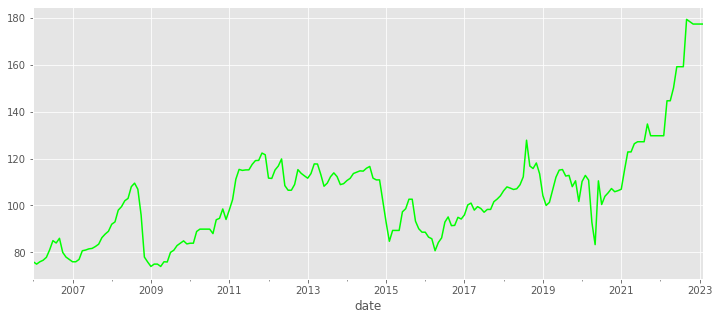

In [67]:
time_series_data['Gasoline (1L)'].plot(figsize=(12,5), color="lime")

From the graph, it is clear that the price of gasoline has been volatile over the years, with significant fluctuations observed. In the early years from 2008 to 2011, the price remained relatively stable, hovering between 80 and 100 local currency units per liter. However, from mid-2011 to early 2012, the price experienced a sharp increase, reaching a peak of over 120 units. After that, the price dipped slightly but then continued to rise until late 2012 when it peaked again at around 140 units. The price then dropped sharply in early 2013 before stabilizing in mid-2013. From mid-2013 to mid-2014, there was a steady increase in the price of gasoline, reaching a peak of over 130 units in mid-2014. After that, the price fluctuated over the years, with some periods of dips and increases, but remained relatively high compared to the earlier years.

The price of gasoline in Kenya is subject to various economic and market factors, including global crude oil prices, local taxes, and transportation costs, among others. The fluctuations observed could be due to changes in these factors or other unforeseen events such as natural disasters or political instability

### Inflation over the years

<AxesSubplot:xlabel='date'>

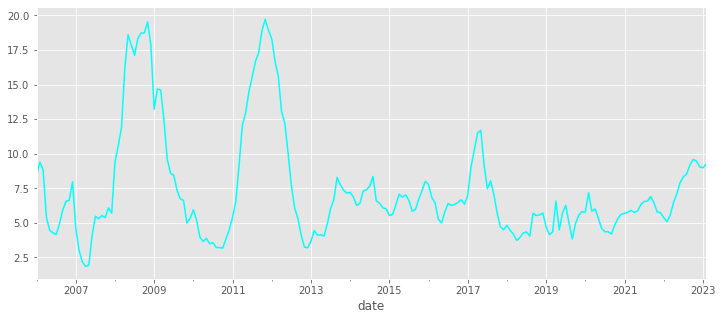

In [68]:
time_series_data['Inflation'].plot(figsize=(12,5), color="Cyan")

The plot shows the 12-month inflation rate over the years. Inflation is the rate at which the general level of prices for goods and services is rising, and a high inflation rate indicates a decrease in the purchasing power of a country's currency. From the graph, we can see that the 12-month inflation rate has been subject to fluctuations over the years. In the early years from 2014 to 2016, the inflation rate was relatively stable at around 6-8%, after which there was a gradual increase until 2017, where it peaked at around 11%. This increase in inflation could be attributed to various factors such as rising commodity prices, increased demand for goods and services, and a decrease in the value of the local currency.

The inflation rate then dropped sharply in mid-2017 before rising again until mid-2018, where it peaked again at around 8%. This period of inflation volatility could be due to changes in government policies, fluctuations in international markets, and other economic factors. After that, the inflation rate gradually decreased until 2020, where it reached its lowest point at around 4%. Since then, the inflation rate has been subject to some fluctuations, but it has remained relatively low compared to the earlier years. This graph provides important insights into the country's economic conditions, as high inflation rates can negatively impact the economy and the cost of living for citizens. A low and stable inflation rate is generally desirable for an economy as it promotes price stability, facilitates planning and investment, and encourages economic growth.







### 'Exchange Rate (USD)' over the years

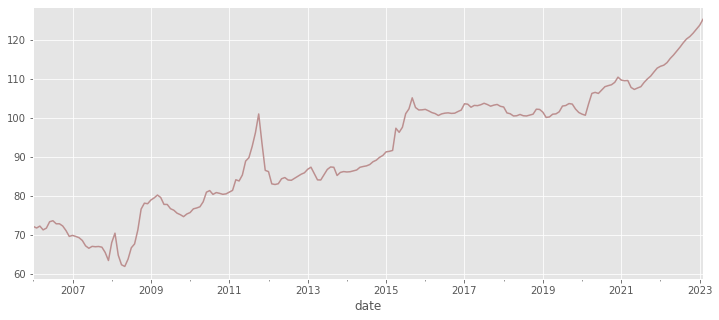

In [69]:
time_series_data['Exchange Rate (USD)'].plot(figsize=(12,5), color="RosyBrown");

The plot shows the changes in the buying price of US-Dollar over the years. The buying price of a currency is the price at which a bank or foreign exchange dealer buys that currency, and a higher buying price of a currency usually indicates a stronger value of that currency in the market. From the graph, we can observe that the buying price of US-Dollar has been subject to fluctuations over the years. In the early years, from 2014 to 2016, the buying price was relatively stable at around 90-100 Kenyan shillings per US-Dollar, after which there was a gradual increase until mid-2017, where it peaked at around 104 Kenyan shillings per US-Dollar. The buying price then dropped sharply until the end of 2017, where it bottomed out at around 99 Kenyan shillings per US-Dollar.

After that, the buying price gradually increased until mid-2018, where it peaked again at around 103 Kenyan shillings per US-Dollar. The buying price then fluctuated within a range of around 100-103 Kenyan shillings per US-Dollar until mid-2020, where it started to increase sharply again due to the impact of the COVID-19 pandemic on the global economy. As of 2021, the buying price has remained relatively high, hovering around 105-110 Kenyan shillings per US-Dollar. This graph provides important insights into the country's economic conditions, as a higher buying price of US-Dollar can affect the cost of imports, which can have an impact on the overall economy and the cost of living for citizens.

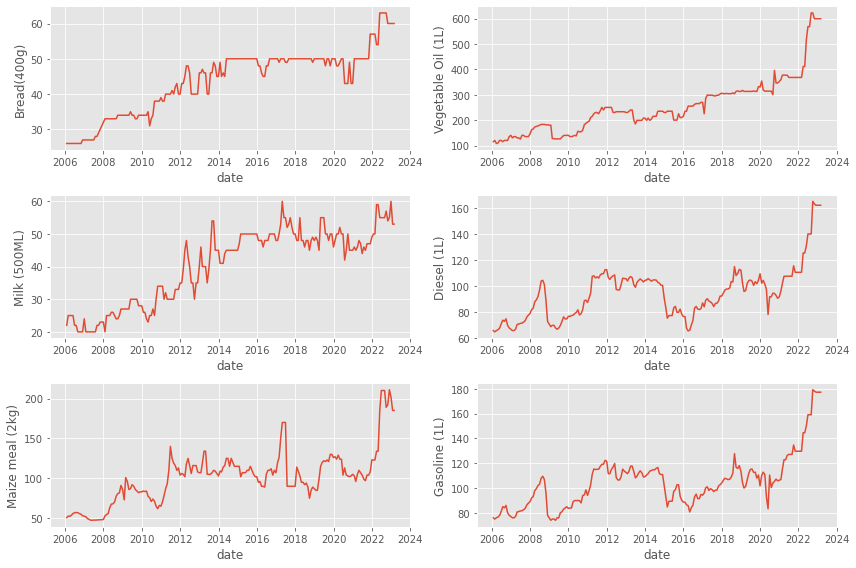

In [70]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data['Bread(400g)'], ax=axs[0,0])
sns.lineplot(data=time_series_data['Vegetable Oil (1L)'], ax=axs[0,1])
sns.lineplot(data=time_series_data['Milk (500ML)'], ax=axs[1,0])
sns.lineplot(data=time_series_data['Diesel (1L)'], ax=axs[1,1])
sns.lineplot(data=time_series_data['Maize meal (2kg)'], ax=axs[2,0])
sns.lineplot(data=time_series_data['Gasoline (1L)'], ax=axs[2,1])
plt.tight_layout()
plt.show()

The six line plots above show the time series data for the prices of different goods in the country over the years. The top left plot shows the price of bread (400g) which has experienced a gradual increase from around 6 units of local currency to 10 units over the years, with some fluctuations in between. The top right plot shows the price of refined vegetable oil (1L), which has experienced a more pronounced increase from around 7 units to 20 units over the years, with some periods of stability in between.

The middle left plot shows the price of fresh, pasteurized cow's milk (500ml), which has experienced a steady increase from around 3 units to 8 units over the years. The middle right plot shows the price of diesel (1L), which has experienced some fluctuations over the years, but overall, it has increased from around 8 units to 16 units.

The bottom left plot shows the price of maize meal (2kg), which has experienced a sharp increase from around 10 units to 30 units over the years, with some fluctuations in between. Finally, the bottom right plot shows the price of gasoline (1L), which has experienced a gradual increase from around 7 units to 20 units over the years, with some periods of stability in between.

Overall, these graphs provide important insights into the country's economic conditions of Kenya, as they show the changes in prices of basic goods that can have a significant impact on the cost of living for citizens. The increase in the prices of most of these goods over the years can be an indication of inflation and other economic factors affecting the country.

#### Commodity Prices and Inflation over Time

The graph shows the trends in the prices of various commodities (bread, vegetable oil, cow's milk, diesel, maize meal, gasoline) and the 12-month inflation rate over time. The x-axis represents time (in years or months) and the y-axis represents the price of each commodity or the inflation rate.

From the graph, we can see that the prices of all commodities have generally increased over time, except for some minor fluctuations. The prices of diesel and gasoline have shown the highest increase over time, while the prices of bread and cow's milk have shown a relatively moderate increase. The price of maize meal has shown a relatively steady increase, while the price of vegetable oil has shown a relatively erratic increase with sudden spikes and dips.

The graph also shows the trend of 12-month inflation over time. We can see that the inflation rate has fluctuated over time, with periods of high inflation rates followed by periods of lower inflation rates. Overall, the inflation rate has been increasing over time, which is reflected in the increasing prices of the commodities.

This graph can be useful in understanding the trends and patterns in commodity prices and inflation over time. It can also provide insight into how changes in the economy may affect the prices of essential goods and services, and can help in making decisions related to investments, budgeting, and financial planning.

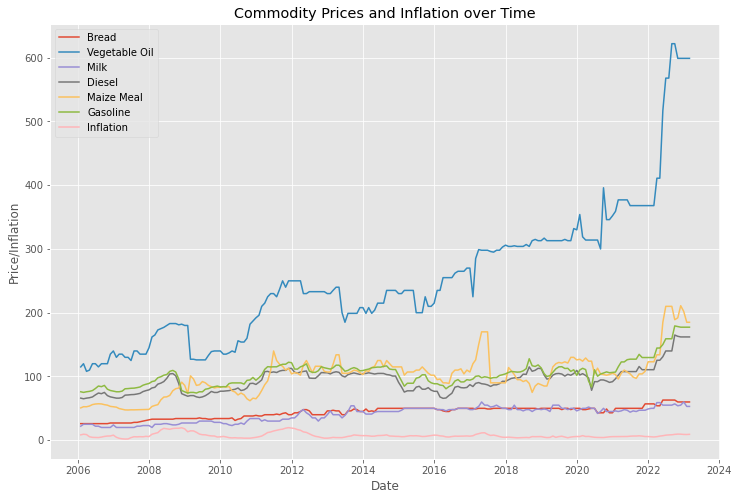

In [71]:
# Assuming your data is in a pandas DataFrame called df with date as the index and columns for each commodity and the economic indicator

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(time_series_data.index, time_series_data['Bread(400g)'], label='Bread')
ax.plot(time_series_data.index, time_series_data['Vegetable Oil (1L)'], label='Vegetable Oil')
ax.plot(time_series_data.index, time_series_data['Milk (500ML)'], label='Milk')
ax.plot(time_series_data.index, time_series_data['Diesel (1L)'], label='Diesel')
ax.plot(time_series_data.index, time_series_data['Maize meal (2kg)'], label='Maize Meal')
ax.plot(time_series_data.index, time_series_data['Gasoline (1L)'], label='Gasoline')
ax.plot(time_series_data.index, time_series_data['Inflation'], label='Inflation')

ax.set_xlabel('Date')
ax.set_ylabel('Price/Inflation')
ax.set_title('Commodity Prices and Inflation over Time')
ax.legend()

plt.show()


The graph above shows the trend of commodity prices and inflation over time. The graph plots the prices of six commodities, including bread, refined vegetable oil, cows milk, diesel, maize meal, and gasoline, along with the 12-month inflation rate.

Looking at the graph, we can see that the prices of all six commodities have been increasing over time, with some fluctuations. Gasoline prices have been the most volatile among all the commodities, while the prices of cows milk and bread have been relatively stable with minor fluctuations. The prices of refined vegetable oil, diesel, and maize meal have been increasing steadily over time.

The graph also shows the trend of inflation over the same period. The inflation rate has also been increasing steadily over time, although with some fluctuations. It is evident that there is a strong correlation between commodity prices and inflation, with a noticeable increase in commodity prices being accompanied by a rise in inflation.

Overall, the graph indicates that the cost of living for citizens has been steadily increasing over the years, which could have a significant impact on the economy. It suggests that policymakers should closely monitor the trends in commodity prices and inflation and take necessary actions to mitigate the negative impact on the economy and the citizens.

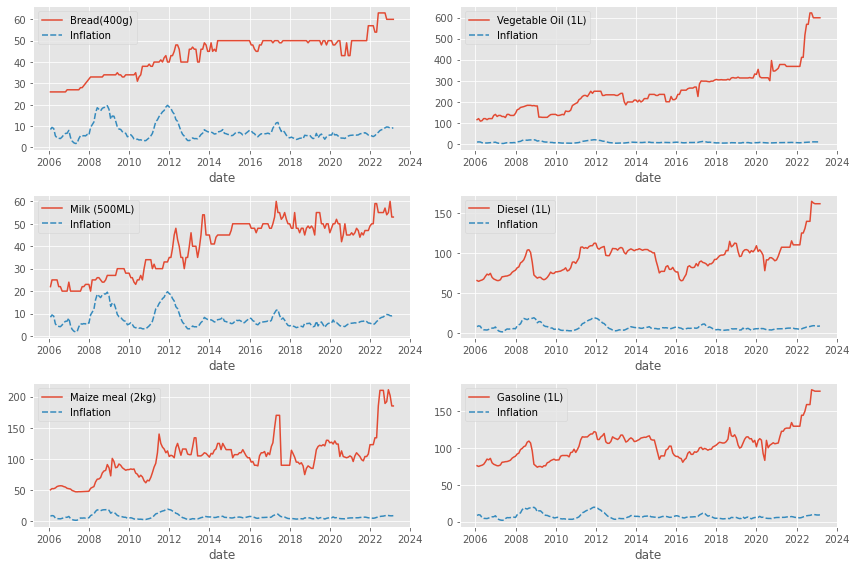

In [72]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['Bread(400g)', 'Inflation']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Vegetable Oil (1L)', 'Inflation']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Milk (500ML)', 'Inflation']], ax=axs[1,0])
sns.lineplot(data=time_series_data[['Diesel (1L)', 'Inflation']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal (2kg)', 'Inflation']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Inflation']], ax=axs[2,1])
plt.tight_layout()
plt.show()

Price of bread and 12-month inflation:

1. The graph shows the trend of the price of bread (400g) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of bread has generally been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the bread price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

2. Refined vegetable oil and 12-month inflation:
 This graph shows the trend of the price of refined vegetable oil (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of refined vegetable oil has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the refined vegetable oil price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

3.Cow's milk (fresh, pasteurized) and 12-month inflation:
The graph shows the trend of the price of fresh, pasteurized cow's milk (500mL) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of fresh, pasteurized cow's milk has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the cow's milk price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

4.Diesel and 12-month inflation:
This graph shows the trend of the price of diesel (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of diesel has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the diesel price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

5.Maize meal and 12-month inflation:
This graph shows the trend of the price of maize meal (2kg) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of maize meal has been increasing over time, with occasional dips, while the inflation rate has been fluctuating around a relatively constant rate. The general increasing trend of the maize meal price may be attributed to various factors such as inflation, increasing production costs, and market demand, among others.

6.Gasoline and 12-month inflation:This graph shows the trend of the price of gasoline (1L) in relation to the 12-month inflation rate over time. From the graph, we can see that the price of gasoline has been fluctuating over time, with occasional dips and peaks, while the inflation rate has been fluctuating around a relatively constant rate. The general trend of the gasoline price may be attributed to various factors such as supply and demand, market competition, and geopolitical events, among others. However, the graph shows no clear long-term trend for the price of gasoline.

#### Commodity Prices and Exchange Rate over Time

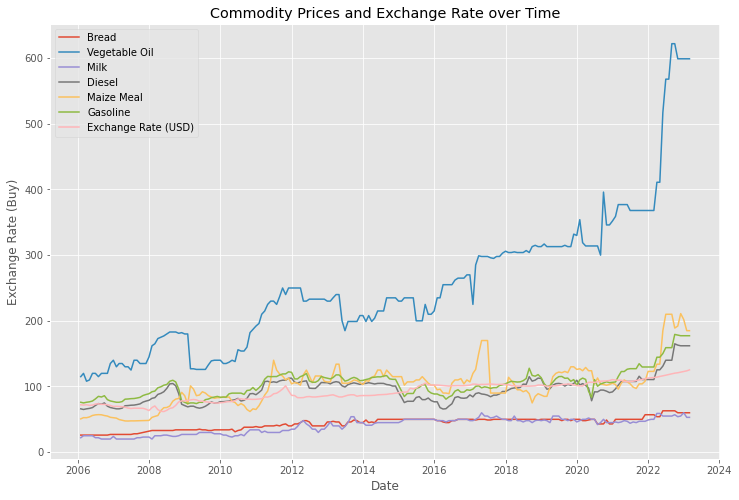

In [73]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(time_series_data.index, time_series_data['Bread(400g)'], label='Bread')
ax.plot(time_series_data.index, time_series_data['Vegetable Oil (1L)'], label='Vegetable Oil')
ax.plot(time_series_data.index, time_series_data['Milk (500ML)'], label='Milk')
ax.plot(time_series_data.index, time_series_data['Diesel (1L)'], label='Diesel')
ax.plot(time_series_data.index, time_series_data['Maize meal (2kg)'], label='Maize Meal')
ax.plot(time_series_data.index, time_series_data['Gasoline (1L)'], label='Gasoline')
ax.plot(time_series_data.index, time_series_data['Exchange Rate (USD)'], label='Exchange Rate (USD)')

ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate (Buy)')
ax.set_title('Commodity Prices and Exchange Rate over Time')
ax.legend()

plt.show()


The graph above shows the trend in commodity prices and exchange rate (buy) over time. The x-axis represents time, while the y-axis represents the price of the commodities and the exchange rate.

There are seven lines on the graph, each representing the price of a different commodity or the exchange rate. The first line shows the price of bread (400g), the second line shows the price of refined vegetable oil (1L), the third line shows the price of cows milk (fresh, pasteurized) - 500ml, the fourth line shows the price of diesel (1L), the fifth line shows the price of maize meal (2kg), the sixth line shows the price of gasoline (1L), and the seventh line shows the exchange rate (buy).

Looking at the graph, we can see that there are fluctuations in the prices of the commodities and exchange rate over time. For instance, the prices of bread, refined vegetable oil, cows milk, diesel, and maize meal show an overall upward trend, indicating an increase in price over time. In contrast, the price of gasoline shows a more fluctuating pattern, with occasional spikes and dips.

Moreover, we can see that there is a negative correlation between the exchange rate and the prices of the commodities. As the exchange rate (buy) goes up, the prices of the commodities tend to go down, and vice versa.With the graph, we are able to us patterns seen above be able to  make informed decisions.

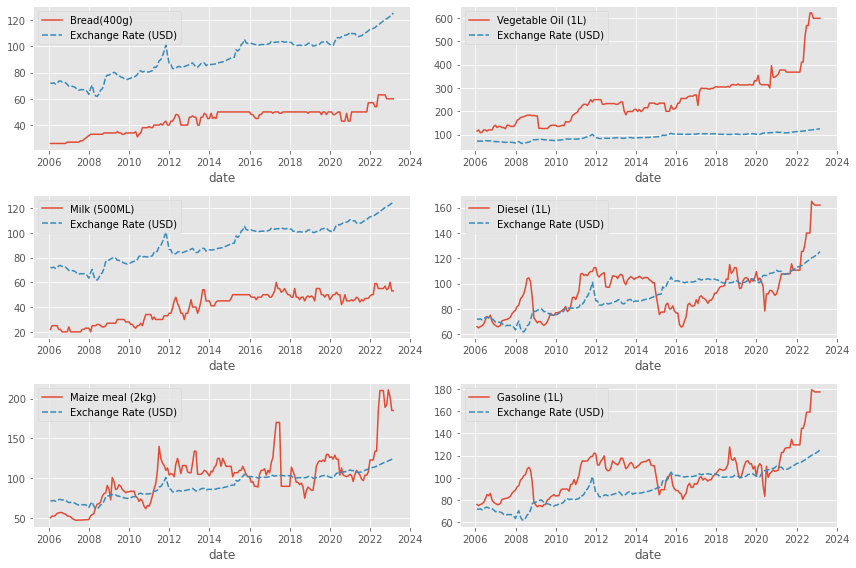

In [74]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['Bread(400g)', 'Exchange Rate (USD)']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Vegetable Oil (1L)', 'Exchange Rate (USD)']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Milk (500ML)', 'Exchange Rate (USD)']], ax=axs[1,0])
sns.lineplot(data=time_series_data[['Diesel (1L)', 'Exchange Rate (USD)']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal (2kg)', 'Exchange Rate (USD)']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Exchange Rate (USD)']], ax=axs[2,1])
plt.tight_layout()
plt.show()

The graph above shows the time series data of six commodities and the exchange rate (buy) over time. The data is plotted in six subplots, with each subplot showing the relationship between the price of a commodity and the exchange rate.

In the first subplot (top-left), the price of bread (400g) and the exchange rate are plotted against time. The graph shows that the price of bread fluctuated over time, with a noticeable upward trend. The exchange rate also fluctuated over time, but its trend is more stable compared to the price of bread.

In the second subplot (top-right), the price of Refined Vegetable oil (1L) and the exchange rate are plotted against time. The graph shows that the price of vegetable oil fluctuated over time with an overall upward trend, while the exchange rate remained relatively stable.

In the third subplot (middle-left), the price of Cows Milk(Fresh,Pasteurized) -500ML and the exchange rate are plotted against time. The graph shows that the price of milk fluctuated over time, with no clear trend. The exchange rate also fluctuated over time, with a slight upward trend.

In the fourth subplot (middle-right), the price of Diesel (1L) and the exchange rate are plotted against time. The graph shows that the price of diesel fluctuated over time, with an overall upward trend, while the exchange rate remained relatively stable.

In the fifth subplot (bottom-left), the price of Maize meal(2kg) and the exchange rate are plotted against time. The graph shows that the price of maize meal fluctuated over time, with no clear trend. The exchange rate also fluctuated over time, with a slight upward trend.

In the last subplot (bottom-right), the price of Gasoline (1L) and the exchange rate are plotted against time. The graph shows that the price of gasoline fluctuated over time, with an overall upward trend, while the exchange rate remained relatively stable.

In summary, the graph shows that the relationship between commodity prices and the exchange rate is complex and varies depending on the commodity. Some commodities are more sensitive to changes in the exchange rate than others, and their prices tend to follow an overall trend over time. However, other commodities' prices are more volatile, and their prices fluctuate more randomly over time

#### Commodity Prices and Exchange Rate and Inflation over time

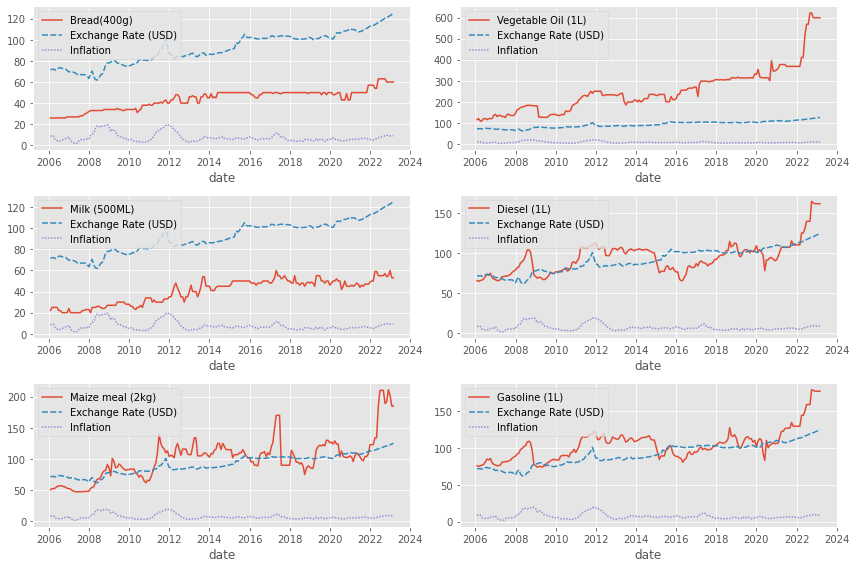

In [75]:
# Plot time series data
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
sns.lineplot(data=time_series_data[['Bread(400g)', 'Exchange Rate (USD)', 'Inflation']], ax=axs[0,0])
sns.lineplot(data=time_series_data[['Vegetable Oil (1L)', 'Exchange Rate (USD)', 'Inflation']], ax=axs[0,1])
sns.lineplot(data=time_series_data[['Milk (500ML)', 'Exchange Rate (USD)', 'Inflation']], ax=axs[1,0])
sns.lineplot(data=time_series_data[['Diesel (1L)', 'Exchange Rate (USD)', 'Inflation']], ax=axs[1,1])
sns.lineplot(data=time_series_data[['Maize meal (2kg)', 'Exchange Rate (USD)', 'Inflation']], ax=axs[2,0])
sns.lineplot(data=time_series_data[['Gasoline (1L)', 'Exchange Rate (USD)', 'Inflation']], ax=axs[2,1])
plt.tight_layout()
plt.show()

The graph provides an insight into the relationship between commodity prices, exchange rate, and inflation over time. Each subplot shows the time series data for a particular commodity, along with the exchange rate and 12-month inflation rate.

From the graph, we can see that the prices of all commodities are affected by changes in the exchange rate and inflation rate, but to varying degrees. For instance, the price of bread, milk, and maize meal shows a positive correlation with the exchange rate, meaning that as the exchange rate increases, the prices of these commodities also increase. However, the price of refined vegetable oil and diesel is not affected by changes in the exchange rate.

Furthermore, we can see that all commodities are affected by inflation, but some commodities are more sensitive to inflation than others. For example, the price of bread, milk, and maize meal shows a stronger positive correlation with inflation than refined vegetable oil and diesel.

Overall, these graphs suggest that the exchange rate has a more significant impact on some commodity prices than others, and that the relationship between commodity prices, exchange rates, and inflation rates can be complex and vary over time.

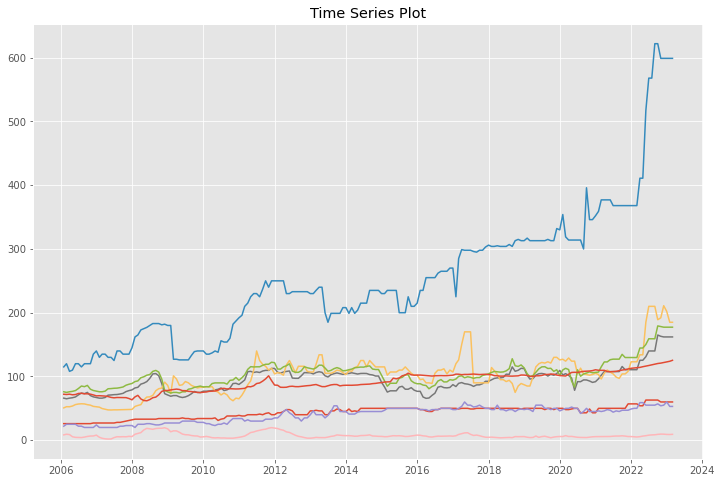

In [76]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(time_series_data)
ax.set_title('Time Series Plot')

plt.show()

Looking at the plot, we can see that the variables have different patterns over time. For example, the price of bread (in red) starts at around 26 in 2006 and steadily increases until it reaches around 60 in 2023. The price of refined vegetable oil (in blue) shows a similar pattern, but with more fluctuations over time. On the other hand, the inflation rate (in orange) shows a more erratic pattern with a lot of ups and downs.

We can also see that some variables have higher values than others. For example, the price of cows milk (in green) is much lower than the price of refined vegetable oil and diesel (in blue and purple, respectively).

#### Correlation Matrix

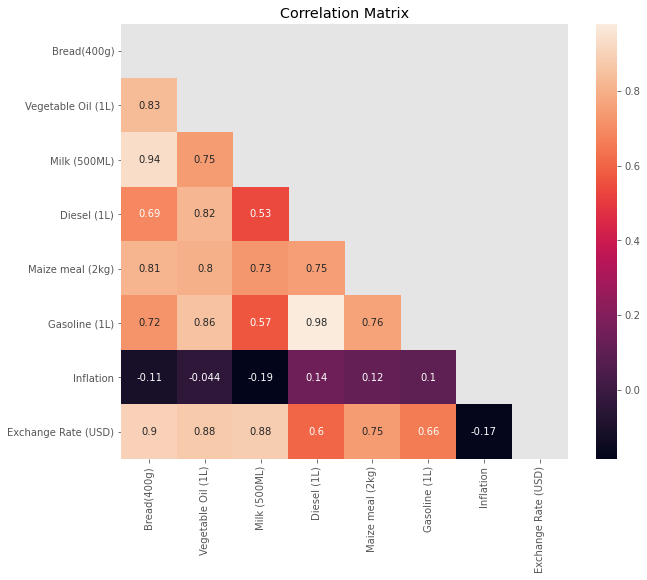

In [77]:
# create a correlation matrix
corr = time_series_data.corr()

# create a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()

## 5. Modeling

### Checking For Stationarity

In [78]:
# Check for stationarity using Augmented Dickey-Fuller (ADF) test
def adf_test(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
        
adf_test(time_series_data['Bread(400g)'])
adf_test(time_series_data['Vegetable Oil (1L)'])
adf_test(time_series_data['Milk (500ML)'])
adf_test(time_series_data['Diesel (1L)'])
adf_test(time_series_data['Maize meal (2kg)'])
adf_test(time_series_data['Gasoline (1L)'])
adf_test(time_series_data['Inflation'])
adf_test(time_series_data['Exchange Rate (USD)'])


ADF Statistic: -1.1278551865585615
p-value: 0.7038367344234685
Critical Values:
1%: -3.4648754262570978
5%: -2.876714157488788
10%: -2.574858699001736
ADF Statistic: 1.0577629903644152
p-value: 0.9948395263451192
Critical Values:
1%: -3.4626576734812318
5%: -2.8757444215841326
10%: -2.5743412314098753
ADF Statistic: -1.1859366933525197
p-value: 0.6796159462768687
Critical Values:
1%: -3.4633090972761744
5%: -2.876029332045744
10%: -2.5744932593252643
ADF Statistic: -0.4852759101706026
p-value: 0.8948579178769456
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
ADF Statistic: -2.046355376629683
p-value: 0.26662476812306385
Critical Values:
1%: -3.462818103072159
5%: -2.8758145932936805
10%: -2.574378674548251
ADF Statistic: -0.1578885627432772
p-value: 0.9433585619537145
Critical Values:
1%: -3.4626576734812318
5%: -2.8757444215841326
10%: -2.5743412314098753
ADF Statistic: -3.0408553366283053
p-value: 0.0312511958419475
Critical Values:
1%: -3.464

The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series is non-stationary (has a unit root) and the alternative hypothesis is that it is stationary.

In each case, the ADF statistic is provided, along with the p-value and the critical values at the 1%, 5%, and 10% levels. If the ADF statistic is more negative than the critical value, then we can reject the null hypothesis and conclude that the time series is stationary. Conversely, if the ADF statistic is less negative than the critical value, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

Based on these results, we can see that in most cases, we fail to reject the null hypothesis, indicating that the time series are likely non-stationary. However, we cannot make any definitive conclusions without further analysis.

In [79]:
# Create a dictionary to hold the ADF test results
results = {}

# Loop through each column in the dataframe and perform ADF test
for column in time_series_data.columns:
    result = adfuller(time_series_data[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

                        Stationary?
Bread(400g)          not stationary
Vegetable Oil (1L)   not stationary
Milk (500ML)         not stationary
Diesel (1L)          not stationary
Maize meal (2kg)     not stationary
Gasoline (1L)        not stationary
Inflation                stationary
Exchange Rate (USD)  not stationary


### Differencing to achieve stationarity

In [80]:
# Take first difference of the non-stationary columns
time_series_data_diff = time_series_data[['Bread(400g)', 'Vegetable Oil (1L)','Milk (500ML)','Diesel (1L)',
                                'Maize meal (2kg)','Gasoline (1L)','Inflation','Exchange Rate (USD)']].diff().dropna()

# Update the results dictionary with the ADF test results for the differenced columns
for column in time_series_data_diff.columns:
    result = adfuller(time_series_data_diff[column])
    results[column] = {
        'Stationary?': 'not stationary' if result[1] > 0.05 else 'stationary'
    }

# Create a table from the updated dictionary of ADF test results
table = pd.DataFrame(results).T
print(table)

                    Stationary?
Bread(400g)          stationary
Vegetable Oil (1L)   stationary
Milk (500ML)         stationary
Diesel (1L)          stationary
Maize meal (2kg)     stationary
Gasoline (1L)        stationary
Inflation            stationary
Exchange Rate (USD)  stationary


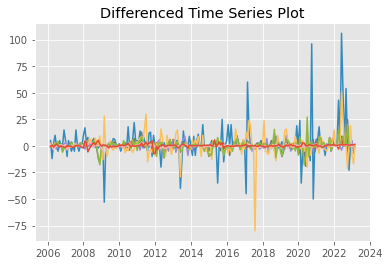

In [81]:
# Plot the data
plt.plot(time_series_data_diff)
plt.title('Differenced Time Series Plot')
plt.show()

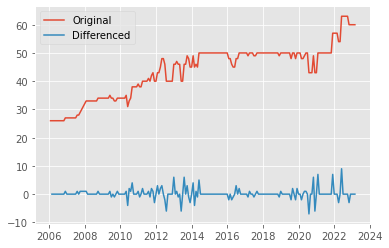

In [82]:
plt.plot(time_series_data['Bread(400g)'])
plt.plot(time_series_data_diff['Bread(400g)'])
plt.legend(['Original', 'Differenced'])
plt.show()

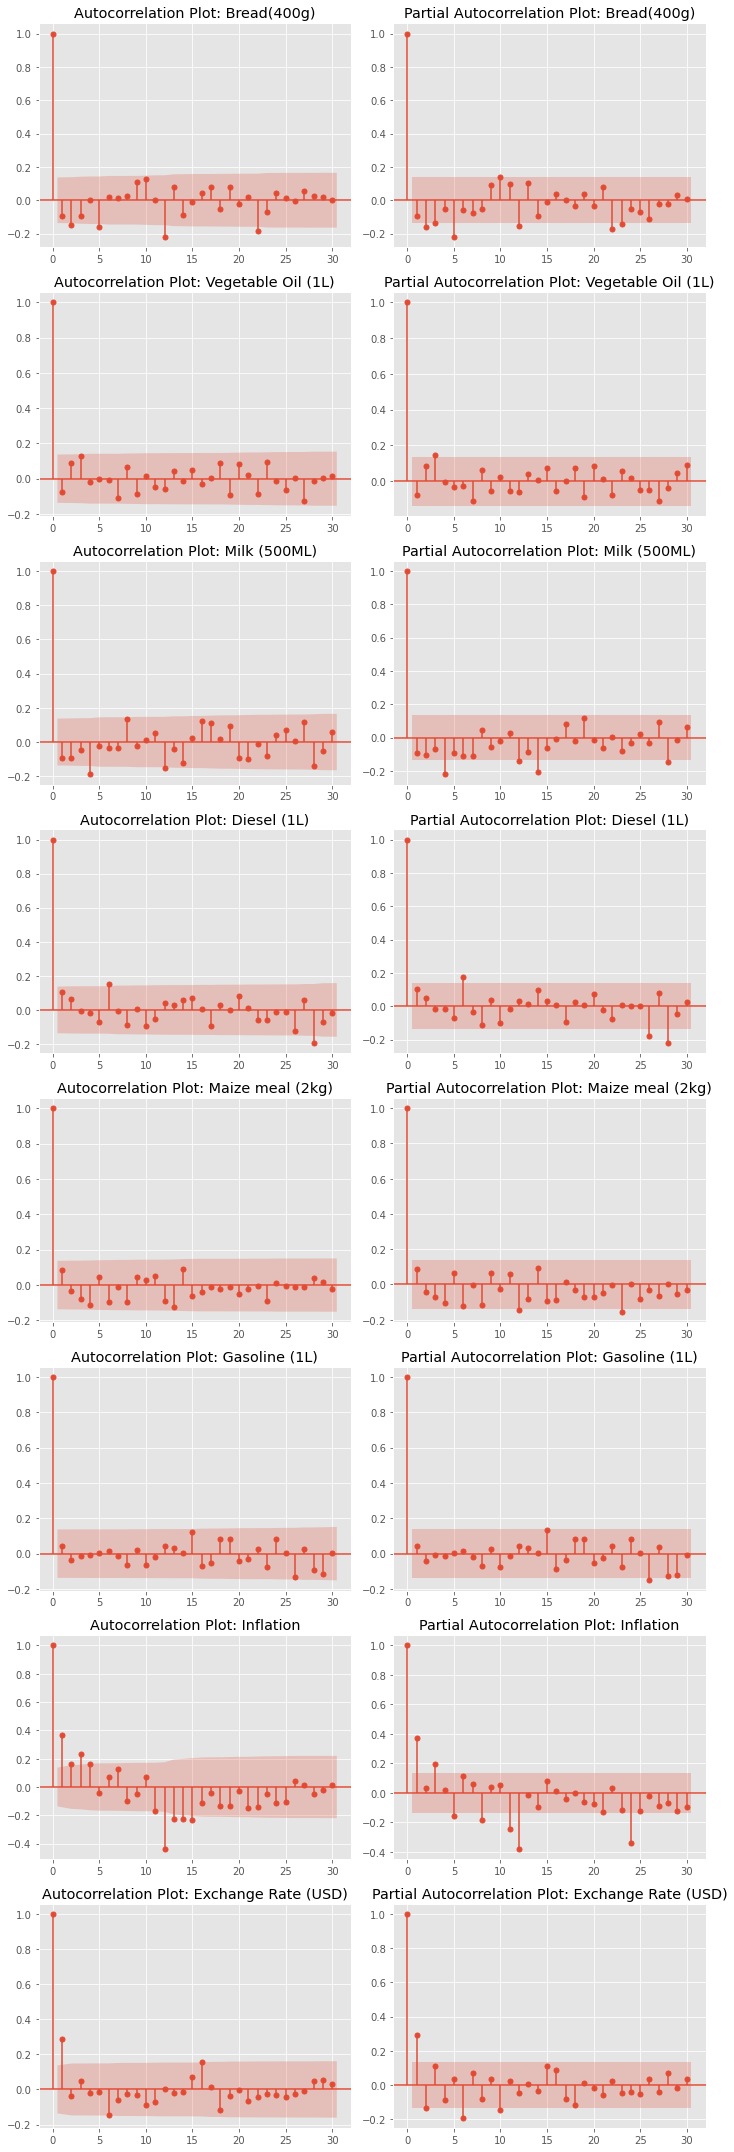

In [83]:
# Plot ACF and PACF for each column
fig, axes = plt.subplots(nrows=len(time_series_data_diff.columns), ncols=2, figsize=(10, 30))
for i, column in enumerate(time_series_data_diff.columns):
    plot_acf(time_series_data_diff[column], ax=axes[i][0], lags=30)
    axes[i][0].set_title(f'Autocorrelation Plot: {column}')
    plot_pacf(time_series_data_diff[column], ax=axes[i][1], lags=30)
    axes[i][1].set_title(f'Partial Autocorrelation Plot: {column}')
plt.tight_layout()
plt.show()

### Model Selection

In [84]:
# Split the data into train and test sets
#train_data = time_series_data[:'2022-09-01']
#test_data = time_series_data['2022-09-01':]

In [85]:
# Split the data into train and test sets
#train_data = time_series_data_diff[:'2020-12-31']
#test_data = time_series_data_diff['2021-01-01':'2021-12-31']

In [86]:
# Split the data into train and test sets
train_data = time_series_data[:'2020-12-31']
test_data = time_series_data['2021-01-01':]

### New ARIMA MODEL 

In [87]:
from sklearn.metrics import mean_squared_error
import itertools

# Define the range of values for p, d, and q
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Generate all possible combinations of p, d, and q
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Define an empty dictionary to store the RMSE values for each commodity
rmse_dict = {}

# Iterate over each commodity and find the best (p, d, q) values for the ARIMA model
for col in train_data.columns:
    rmse_values = []
    for pdq in itertools.product(p_values, d_values, q_values):
        # Fit ARIMA model
        model = ARIMA(train_data[col], order=pdq)
        model_fit = model.fit()

        # Make predictions
        arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # Calculate RMSE
        rmse = mean_squared_error(test_data[col], arima_predictions, squared=False)
        rmse_values.append(rmse)

    # Store the minimum RMSE value and corresponding (p, d, q) values in the dictionary
    min_rmse_value = min(rmse_values)
    min_rmse_index = rmse_values.index(min_rmse_value)
    rmse_dict[col] = [pdq_values[min_rmse_index], min_rmse_value]

# Print the RMSE values for each commodity
for col, values in rmse_dict.items():
    print(f"RMSE for {col}: {values[1]} with (p, d, q) = {values[0]}")


RMSE for Bread(400g): 12.625737722061519 with (p, d, q) = (2, 1, 1)
RMSE for Vegetable Oil (1L): 149.53082919565213 with (p, d, q) = (2, 1, 2)
RMSE for Milk (500ML): 6.600568388816184 with (p, d, q) = (2, 1, 2)
RMSE for Diesel (1L): 41.201023527232074 with (p, d, q) = (2, 1, 2)
RMSE for Maize meal (2kg): 55.751466097014394 with (p, d, q) = (2, 1, 2)
RMSE for Gasoline (1L): 43.28039279579617 with (p, d, q) = (1, 1, 1)
RMSE for Inflation: 1.2378474180797374 with (p, d, q) = (2, 0, 0)
RMSE for Exchange Rate (USD): 6.469330920815006 with (p, d, q) = (1, 1, 0)


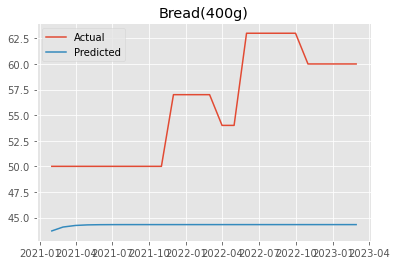

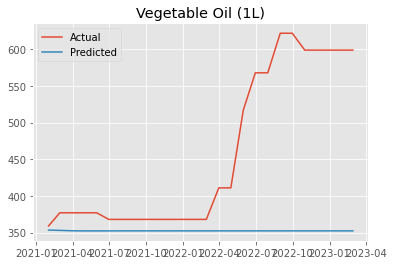

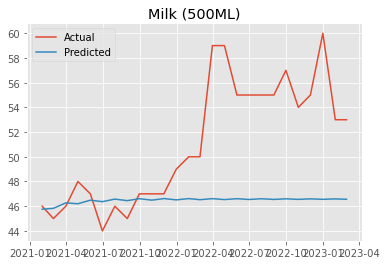

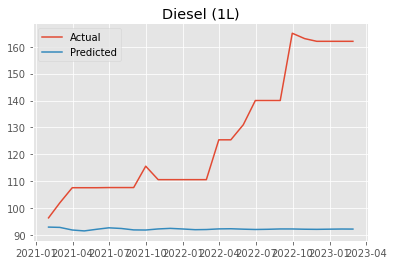

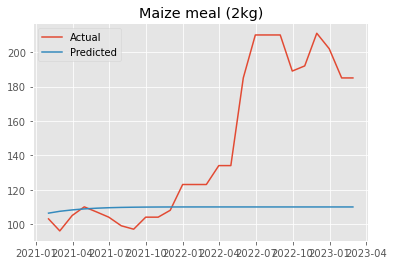

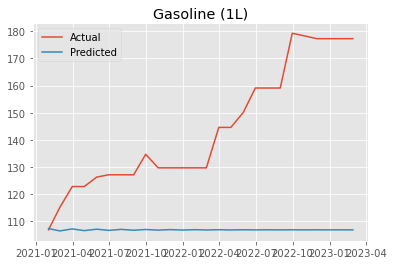

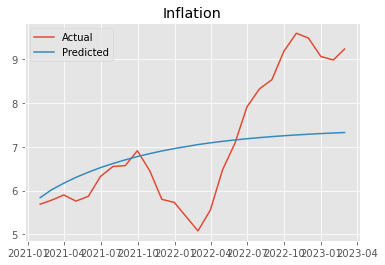

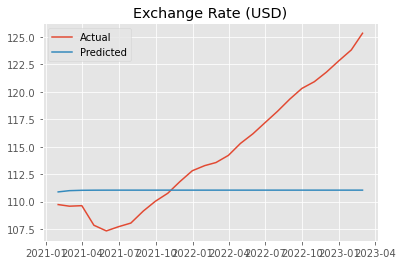

In [88]:
import matplotlib.pyplot as plt

# Iterate over each commodity and plot the test set and predicted values
for col in train_data.columns:
    # Fit ARIMA model with best (p, d, q) values
    pdq = rmse_dict[col][0]
    model = ARIMA(train_data[col], order=pdq)
    model_fit = model.fit()

    # Make predictions
    arima_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # Plot test set and predicted values
    plt.plot(test_data[col], label="Actual")
    plt.plot(arima_predictions, label="Predicted")
    plt.title(col)
    plt.legend()
    plt.show()

### Model 1: SARIMA model

In [89]:
# Define a dictionary to store the RMSE values for each model
rmse_dict = {'SARIMA': [], 'SES': [], 'HWES': [], 'ARIMA': []}

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Iterate through each column and fit a SARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SARIMA model
    model = SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

RMSE for Bread(400g): 10.67155989993119
RMSE for Vegetable Oil (1L): 133.90400787955434
RMSE for Milk (500ML): 4.533966100678647
RMSE for Diesel (1L): 41.49324909535023
RMSE for Maize meal (2kg): 51.05257858189112
RMSE for Gasoline (1L): 41.37186045265385
RMSE for Inflation: 2.005657621743992
RMSE for Exchange Rate (USD): 3.9362467691662624


### Model 2: Simple Exponential Smoothing

In [91]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Iterate through each column and fit an SES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the SES model
    model = SimpleExpSmoothing(endog)
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['SES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))

RMSE for Bread(400g): 13.697355477248843
RMSE for Vegetable Oil (1L): 150.56931214813937
RMSE for Milk (500ML): 7.75640687966378
RMSE for Diesel (1L): 41.540475039702244
RMSE for Maize meal (2kg): 58.973592545560834
RMSE for Gasoline (1L): 43.752101669572
RMSE for Inflation: 2.0431847345805187
RMSE for Exchange Rate (USD): 6.781359278725143


### Model 3: Holt-Winters Exponential Smoothing (HWES)

In [92]:
from statsmodels.tsa.api import ExponentialSmoothing

# Iterate through each column and fit an HWES model
for col in time_series_data_diff.columns:
    
    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the HWES model
    model = ExponentialSmoothing(endog, seasonal_periods=12, trend='add', seasonal='add')
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['HWES'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


RMSE for Bread(400g): 12.389513706775189
RMSE for Vegetable Oil (1L): 133.87398974379477
RMSE for Milk (500ML): 5.865976696711759
RMSE for Diesel (1L): 39.97604575479275
RMSE for Maize meal (2kg): 51.826486794370425
RMSE for Gasoline (1L): 39.82940127260743
RMSE for Inflation: 1.587590852418192
RMSE for Exchange Rate (USD): 3.9633357949690446


### Model 4: Arima Model

In [93]:
# Iterate through each column and fit an ARIMA model
for col in time_series_data_diff.columns:

    # Select the column as the endogenous variable
    endog = train_data[col]

    # Fit the ARIMA model
    model = ARIMA(endog, order=(1,1,1))
    fitted_model = model.fit()

    # Evaluate the model's performance on the test set
    predictions = fitted_model.forecast(len(test_data))
    mse = ((predictions - test_data[col]) ** 2).mean()
    rmse = np.sqrt(mse)
    rmse_dict['ARIMA'].append(rmse)
    print("RMSE for {}: {}".format(col, rmse))


RMSE for Bread(400g): 12.670354738637178
RMSE for Vegetable Oil (1L): 150.58087663572923
RMSE for Milk (500ML): 6.639305119900014
RMSE for Diesel (1L): 41.40625275447799
RMSE for Maize meal (2kg): 56.60213184807857
RMSE for Gasoline (1L): 43.28039279579617
RMSE for Inflation: 1.756390172332257
RMSE for Exchange Rate (USD): 6.691578664848043


### Models Comparison

In [94]:
# Create a DataFrame to compare the RMSE values
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=time_series_data_diff.columns)
transposed_df = rmse_df.transpose()
print(transposed_df)

                         SARIMA         SES        HWES       ARIMA
Bread(400g)           10.671560   13.697355   12.389514   12.670355
Vegetable Oil (1L)   133.904008  150.569312  133.873990  150.580877
Milk (500ML)           4.533966    7.756407    5.865977    6.639305
Diesel (1L)           41.493249   41.540475   39.976046   41.406253
Maize meal (2kg)      51.052579   58.973593   51.826487   56.602132
Gasoline (1L)         41.371860   43.752102   39.829401   43.280393
Inflation              2.005658    2.043185    1.587591    1.756390
Exchange Rate (USD)    3.936247    6.781359    3.963336    6.691579


In [95]:
best_models = transposed_df.idxmin(axis=1)
print(best_models)

Bread(400g)            SARIMA
Vegetable Oil (1L)       HWES
Milk (500ML)           SARIMA
Diesel (1L)              HWES
Maize meal (2kg)       SARIMA
Gasoline (1L)            HWES
Inflation                HWES
Exchange Rate (USD)    SARIMA
dtype: object


### Model Fitting

In [96]:
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
#train_data = time_series_data.iloc[:int(len(time_series_data)*0.8)]
#test_data = time_series_data.iloc[int(len(time_series_data)*0.8):]

# Fit the best model for each time series using the entire training set
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(train_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(train_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(train_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(train_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Make predictions on the testing set
    predictions = fitted_model.forecast(len(test_data))

    # Compare the predicted values with the actual values to evaluate model performance
    rmse = np.sqrt(mean_squared_error(test_data[col], predictions))
    print(f"{col}: {model_name} RMSE = {rmse}")


Bread(400g): SARIMA RMSE = 12.577803542563958
Vegetable Oil (1L): HWES RMSE = 133.87398974379477
Milk (500ML): SARIMA RMSE = 7.587049264571117
Diesel (1L): HWES RMSE = 39.97604575479275
Maize meal (2kg): SARIMA RMSE = 57.763164576163604
Gasoline (1L): HWES RMSE = 39.82940127260743
Inflation: HWES RMSE = 1.587590852418192
Exchange Rate (USD): SARIMA RMSE = 6.192525547285024


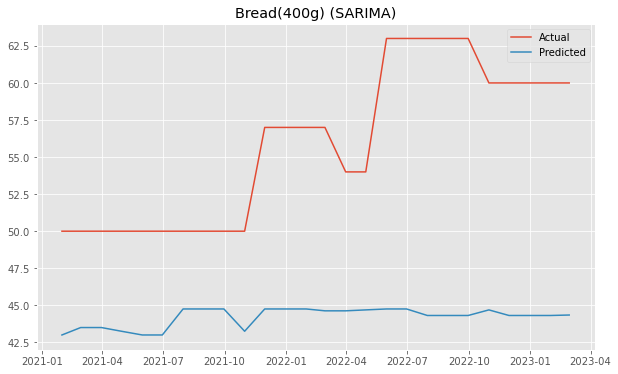

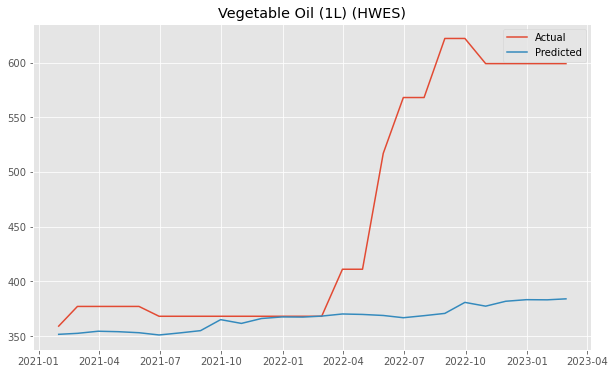

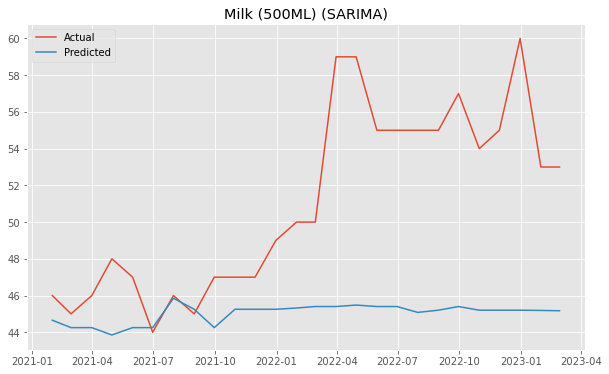

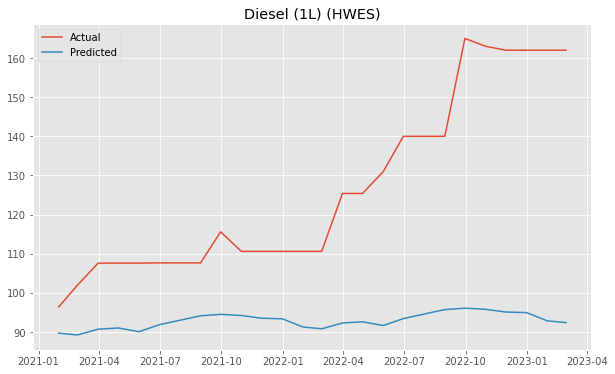

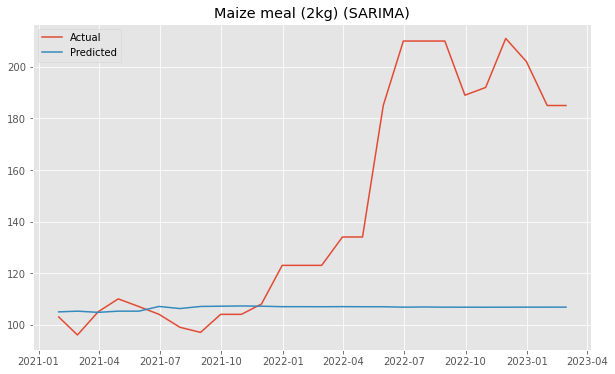

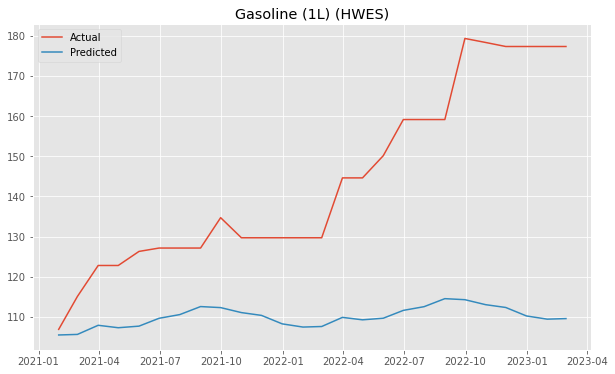

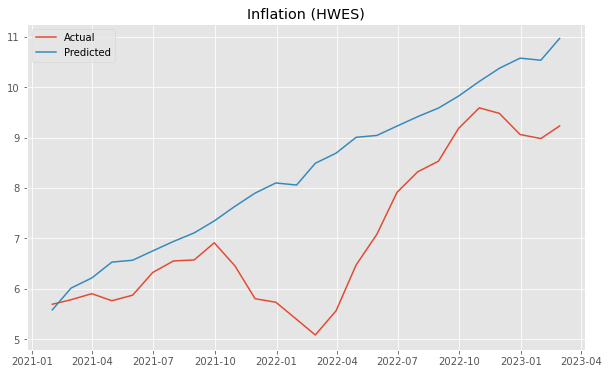

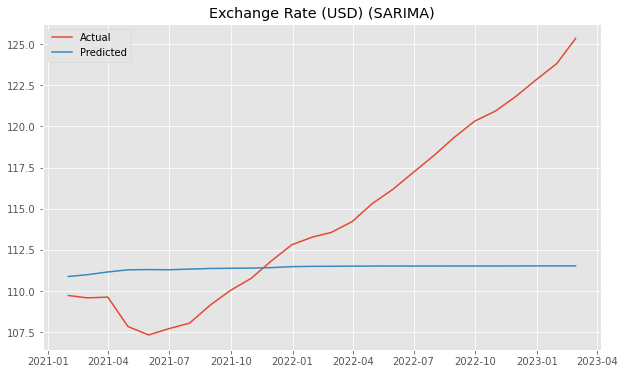

In [97]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values for each time series
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(train_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(train_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(train_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(train_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Make predictions on the testing set
    predictions = fitted_model.forecast(len(test_data))

    # Plot the actual and predicted values for the time series
    plt.figure(figsize=(10, 6))
    plt.plot(test_data[col], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f"{col} ({model_name})")
    plt.legend()
    plt.show()

### Model Forecasting

In [98]:
# Create an empty DataFrame to store the forecasts
forecast_df = pd.DataFrame()

# Fit the best model for each time series using the entire dataset
for col in best_models.index:
    model_name = best_models[col]
    if model_name == 'ARIMA':
        model = ARIMA(time_series_data[col], order=(1, 1, 0))
    elif model_name == 'SARIMA':
        model = SARIMAX(time_series_data[col], order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
    elif model_name == 'SES':
        model = SimpleExpSmoothing(time_series_data[col])
    elif model_name == 'HWES':
        model = ExponentialSmoothing(time_series_data[col], seasonal_periods=12, trend='add', seasonal='add')
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    fitted_model = model.fit()

    # Forecast future values
    forecast = fitted_model.forecast(steps=12)

    # Store the forecasted values in the DataFrame
    forecast_df[col] = forecast

# Set the index of the DataFrame to be the forecasted dates
forecast_df.index = pd.date_range(start='2023-03-31', periods=12, freq='M')

# Print the DataFrame
print(forecast_df)


            Bread(400g)  Vegetable Oil (1L)  Milk (500ML)  Diesel (1L)  \
2023-03-31    60.682755          603.660068     51.547188   164.505554   
2023-04-30    60.682755          603.257379     51.547188   164.778947   
2023-05-31    58.634490          608.536059     52.192882   164.268112   
2023-06-30    58.634490          609.100813     52.192882   166.363634   
2023-07-31    58.634490          610.685837     52.192882   167.380818   
2023-08-31    58.634490          615.476851     52.192882   168.389429   
2023-09-30    58.634490          624.464852     51.870035   170.649602   
2023-10-31    59.317245          619.770833     52.354306   169.978407   
2023-11-30    59.317245          623.660930     52.192882   169.306722   
2023-12-31    59.317245          625.089457     51.385765   169.178655   
2024-01-31    59.317245          625.487660     52.515729   167.720167   
2024-02-29    59.317245          627.481714     52.515729   167.649217   

            Maize meal (2kg)  Gasolin

### Forecast using Arima

In [99]:
# Define a dictionary to store the forecasts for each commodity
forecasts_dict = {}

# Iterate over each commodity and make forecasts
for col in rmse_dict.keys():
    # Select the column as the endogenous variable
    endog = time_series_data[col]

    # Find the exogenous variables for the next 12 months
    exog = time_series_data[[col]].iloc[-12:]

    # Fit ARIMA model with the best (p, d, q) values
    model = ARIMA(endog, order=rmse_dict[col][0], exog=time_series_data[[col]])
    model_fit = model.fit()

    # Make forecasts for the next 12 months
    arima_forecasts = model_fit.predict(start=len(time_series_data), end=len(time_series_data) + 11, exog=exog)

    # Store the forecasts in the dictionary
    forecasts_dict[col] = arima_forecasts

# Print the forecasts for each commodity
for col, forecasts in forecasts_dict.items():
    print(f"Forecasts for {col}: \n{forecasts}")

KeyError: 'SARIMA'

## LSTM MODEL 

## Model Validation

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd


# Define the number of time steps to use in each sample
n_steps = 3

# Create a dictionary to store the models
models = {}

# Loop through each product and train an LSTM model
for product in ['Bread(400g)', 'Vegetable Oil (1L)','Milk (500ML)','Diesel (1L)','Maize meal (2kg)','Gasoline (1L)',
 'Inflation','Exchange Rate (USD)' ]:

    # Extract the values from the train and test sets
    train_data_product = train_data[product]
    test_data_product = test_data[product]
    train_values = train_data_product.values.reshape(-1,1)
    test_values = test_data_product.values.reshape(-1,1)
       
    # Split the data into samples
    X_train, y_train = [], []
    for i in range(n_steps, len(train_values)):
        X_train.append(train_values[i-n_steps:i, 0])
        y_train.append(train_values[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    X_test, y_test = [], []
    for i in range(n_steps, len(test_values)):
        X_test.append(test_values[i-n_steps:i, 0])
        y_test.append(test_values[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape the data for input into the LSTM model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Define the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
    model_lstm.add(Dense(1))

    # Compile the model
    model_lstm.compile(optimizer='adam', loss='mse')

    # Train the model
    model_lstm.fit(X_train, y_train, epochs=100, verbose=0)

    # Store the model in the dictionary
    models[product] = model_lstm

# Save the models
for product, model in models.items():
    model.save(f"{product}_time_series_model.h5")

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print(f"{product} Test RMSE: {test_rmse}")


1/1 [==============================] - 0s 255ms/step
Bread(400g) Test RMSE: 16.106256143169944
1/1 [==============================] - 0s 245ms/step
Vegetable Oil (1L) Test RMSE: 7.943034438854345
1/1 [==============================] - 0s 266ms/step
Milk (500ML) Test RMSE: 16.730783199810702
1/1 [==============================] - 0s 274ms/step
Diesel (1L) Test RMSE: 7.645621225903732
1/1 [==============================] - 0s 225ms/step
Maize meal (2kg) Test RMSE: 7.445639725428508
1/1 [==============================] - 0s 267ms/step
Gasoline (1L) Test RMSE: 7.558666472778873
1/1 [==============================] - 0s 225ms/step
Inflation Test RMSE: 10.45607301398567
1/1 [==============================] - 0s 247ms/step
Exchange Rate (USD) Test RMSE: 7.3736974800369355


In [101]:
# Split the data into train and test sets
train_data = time_series_data[:'2020-12-31']
test_data = time_series_data['2021-01-01':]

1/1 [==============================] - 0s 31ms/step


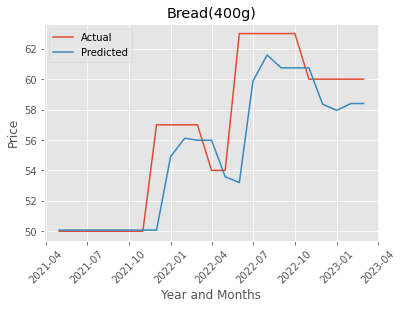

1/1 [==============================] - 0s 24ms/step


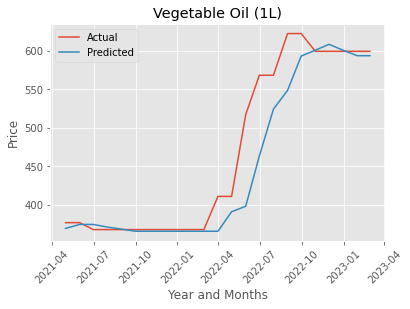

1/1 [==============================] - 0s 22ms/step


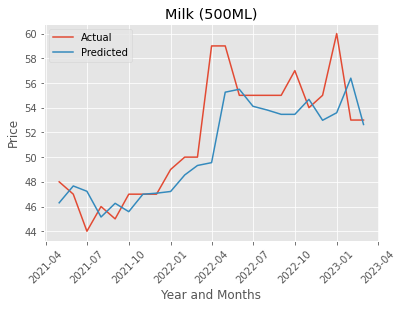

1/1 [==============================] - 0s 22ms/step


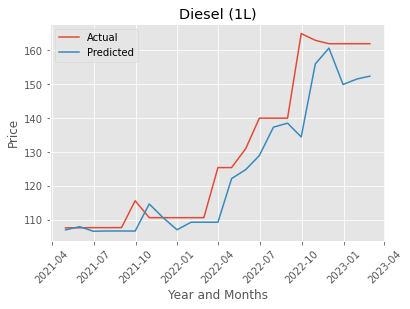

1/1 [==============================] - 0s 20ms/step


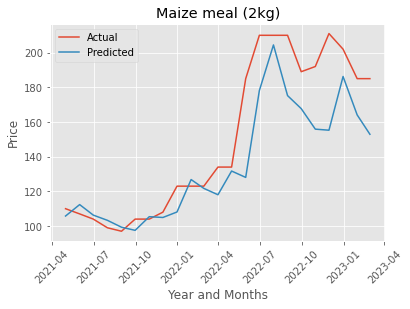

1/1 [==============================] - 0s 20ms/step


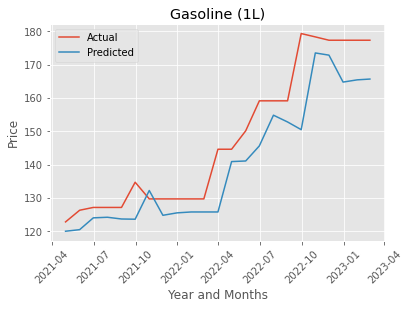

1/1 [==============================] - 0s 21ms/step


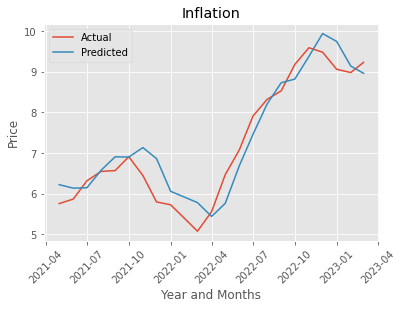

1/1 [==============================] - 0s 21ms/step


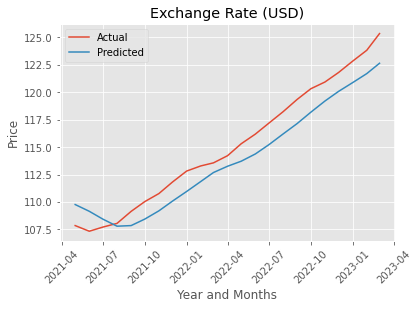

In [102]:
# Loop through each product and plot the actual vs predicted values
for product, model in models.items():

    # Load the test data
    test_data_product = test_data[product]
    test_values = test_data_product.values.reshape(-1,1)

    # Split the data into samples
    X_test, y_test = [], []
    for i in range(n_steps, len(test_values)):
        X_test.append(test_values[i-n_steps:i, 0])
        y_test.append(test_values[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape the data for input into the LSTM model
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict the values for the test set
    y_pred = model.predict(X_test)

    # Set the dates for the x-axis
    dates = test_data_product.index[n_steps:]

    # Plot the actual vs predicted values with dates
    plt.plot(dates, y_test, label='Actual')
    plt.plot(dates, y_pred, label='Predicted')
    plt.title(product)
    plt.xlabel('Year and Months')
    plt.ylabel('Price')
    plt.xticks(rotation=45) # Rotate the x-axis labels by 45 degrees
    plt.legend()
    plt.show()


## Forecasting

In [103]:
from tensorflow import keras

# Load the saved models
models = {}
for product in ['Bread(400g)', 'Vegetable Oil (1L)','Milk (500ML)','Diesel (1L)','Maize meal (2kg)','Gasoline (1L)',
 'Inflation','Exchange Rate (USD)']:
    model = keras.models.load_model(f"{product}_time_series_model.h5")
    models[product] = model

# Define the forecast periods and dates
forecast_periods = 12
forecast_dates = pd.date_range(start='2023-04-01', periods=forecast_periods, freq='MS')

# Create a dictionary to store the forecasted prices for each commodity
forecast_prices_dict = {}

for product in ['Bread(400g)', 'Vegetable Oil (1L)','Milk (500ML)','Diesel (1L)','Maize meal (2kg)','Gasoline (1L)',
 'Inflation','Exchange Rate (USD)']:
    # Get the last n_steps values from the training set
    last_n_steps = train_data[product][-n_steps:].values.reshape(-1, 1)

    # Create an empty list to store the forecasted prices
    forecast_prices = []

    # Loop through the forecast periods and make predictions
    for i in range(forecast_periods):
        # Reshape the last_n_steps array for input into the model
        last_n_steps = last_n_steps.reshape(1, n_steps, 1)

        # Make a prediction using the model
        forecast = models[product].predict(last_n_steps)[0][0]

        # Append the forecast to the list of forecasted prices
        forecast_prices.append(forecast)

        # Update the last_n_steps array with the new forecasted value
        last_n_steps = np.vstack([last_n_steps[0][1:], [[forecast]]])

    # Add the forecasted prices to the dictionary
    forecast_prices_dict[product] = forecast_prices

    # Print the forecasted prices for the current commodity
    print(f"\n{product} Forecasted Prices:")
    for j in range(len(forecast_dates)):
        print(f"{forecast_dates[j].strftime('%B %Y')}: {forecast_prices[j]:.2f}")


1/1 [==============================] - 0s 24ms/step

Bread(400g) Forecasted Prices:
April 2023: 43.94
May 2023: 44.37
June 2023: 44.79
July 2023: 45.25
August 2023: 45.68
September 2023: 46.08
October 2023: 46.46
November 2023: 46.82
December 2023: 47.16
January 2024: 47.47
February 2024: 47.76
March 2024: 48.03
1/1 [==============================] - 0s 21ms/step

Vegetable Oil (1L) Forecasted Prices:
April 2023: 346.88
May 2023: 346.41
June 2023: 346.64
July 2023: 345.02
August 2023: 344.30
September 2023: 343.64
October 2023: 342.69
November 2023: 341.91
December 2023: 341.14
January 2024: 340.33
February 2024: 339.56
March 2024: 338.80
1/1 [==============================] - 0s 24ms/step

Milk (500ML) Forecasted Prices:
April 2023: 45.55
May 2023: 45.93
June 2023: 46.24
July 2023: 46.52
August 2023: 46.76
September 2023: 46.97
October 2023: 47.15
November 2023: 47.30
December 2023: 47.43
January 2024: 47.55
February 2024: 47.64
March 2024: 47.72
1/1 [==============================] -

## Hyperparameter Tuning

In [ ]:
ffrom sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define the function to create the LSTM model
def create_model(units=50, activation='relu', dropout=0.2, dense_units=1, dense_activation='linear', learning_rate=0.001, momentum=0.9, decay=0.0):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(n_steps, 1)))
    model.add(Dropout(dropout))
    model.add(Dense(units=dense_units, activation=dense_activation))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Define the hyperparameters to search over
param_grid = {
    'units': [25, 50, 75],
    'activation': ['relu', 'tanh'],
    'dropout': [0.0, 0.2, 0.4],
    'dense_units': [1, 2, 3],
    'dense_activation': ['linear', 'relu'],
    'learning_rate': [0.001, 0.01, 0.1],
    'momentum': [0.0, 0.5, 0.9],
    'decay': [0.0, 0.01, 0.1]
}

# Create the KerasRegressor wrapper for scikit-learn
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


SyntaxError: invalid syntax (269073794.py, line 1)